## Case Study 3: Building and Evaluating Predictive Models

## Regression

In [32]:
def data_prep():
   
    df = loadCsv()
    df = convertDataTypes(df)
    df = mapToNumericType(df)
    # one-hot encoding
    df = pd.get_dummies(df)
    
    return df

In [33]:
def loadCsv():
    df = pd.read_csv('Project datasets/D2.csv')
    return df

In [34]:
def convertDataTypes(df):
    # change DemCluster from interval/integer to nominal/str
    df['contacts_count'] = df['contacts_count'].astype('int64')
    df['house_count'] = df['house_count'].astype('int64')
    df['alcohol'] = df['alcohol'].astype('int64')
    return df

In [35]:
#mapping categorical to numeric type
def mapToNumericType(df):
    # mapping

    insurance_map = {'yes':1, 'no': 0}
    df['insurance'] = df['insurance'].map(insurance_map)

    immigrant_map = {'native':0, 'immigrant': 1}
    df['immigrant'] = df['immigrant'].map(immigrant_map)
    
    return df


In [36]:
#data preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = data_prep()
print(df)
# target/input split
y = df['covid19_positive']
X = df.drop(['covid19_positive'], axis=1)

X_mat = X.to_numpy()
X_mat

# setting random state
rs = 10

#splitting
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)


      height  weight  insurance  immigrant  alcohol  contacts_count  \
0        174      64          1          0        3               7   
1        182     118          1          0        0               7   
2        184     118          1          0        0               7   
3        164      72          1          0       14               7   
4        192      92          1          0        0               7   
...      ...     ...        ...        ...      ...             ...   
6105     174      72          1          0        3               5   
6106     164     130          0          0        3              21   
6107     162      56          1          0        0              10   
6108     158      70          1          1        3              14   
6109     170      86          1          0        0              11   

      house_count  worried  covid19_positive  gender_female  ...  \
0               2        4                 1              0  ...   
1          

In [37]:
#scaling to a one scale

from sklearn.preprocessing import StandardScaler

# initialise a standard scaler object
scaler = StandardScaler()

# learn the mean and std.dev of variables from training data
# then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)



# use the statistic that you learned from training to transform test data
# NEVER learn from test data, this is supposed to be a set of dataset
# that the model has never seen before
X_test = scaler.transform(X_test)

**Training logistic regression**

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=rs)

# fit it to training data
model.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [39]:
from sklearn.metrics import classification_report, accuracy_score
# training and test accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.6972176759410802
Test accuracy: 0.6879432624113475
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1070
           1       0.65      0.55      0.60       763

    accuracy                           0.69      1833
   macro avg       0.68      0.67      0.67      1833
weighted avg       0.68      0.69      0.68      1833



The model does not produce an acceptable accuracy score on training data. The training accuracy is slightly higher than the test accuracy which may indicate slight overfitting but that needs to be investigated. We will tune this logistic regression model later using GridSearchCV to imrprove the accuracy.


The linear/logistic regression model assumes a linear correlation between input features and target values. This relationship is reflected in the weight values. By using this coefficient values we can say the relations of features

In [10]:
print(model.coef_)

[[-0.24890769  0.31627311  0.13528532 -0.14155121  0.00548429 -0.02051598
   0.23994946  0.10863281 -0.06861754  0.0608372   0.08030661 -0.03921922
   0.23212219 -0.05574902  0.08577206  0.04790336 -0.06373345  0.01523689
  -0.15145331 -0.09300041  0.15210127  0.20239669 -0.04950819  0.07382112
  -0.01566956 -0.02906288 -0.00145511  0.0019877  -0.03139235 -0.01035615
   0.0382216   0.04751377 -0.34844713  0.00422614  0.31667123 -0.06132555
  -0.01893036  0.02218196  0.0018235   0.0293783   0.02156745 -0.03609301
   0.01919546  0.02893437 -0.03078311  0.01374469 -0.00418232  0.00756852
   0.04913509 -0.09607252  0.00507891 -0.04231915  0.16580021 -0.08072391]]


In [12]:
feature_names = X.columns
coef = model.coef_[0]

# limit to 20 features, you can comment the following line to print out everything
coef = coef[:20]

for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])

height : -0.24890769133540921
weight : 0.31627310913582046
insurance : 0.13528531552068518
immigrant : -0.14155120970206425
alcohol : 0.005484291414198865
contacts_count : -0.020515975069363732
house_count : 0.23994946265422906
worried : 0.10863281254625606
gender_female : -0.06861753815134271
gender_male : 0.06083719504178121
gender_other : 0.08030661091914368
age_0_10 : -0.039219221512097904
age_100_110 : 0.2321221864216097
age_10_20 : -0.0557490180099714
age_20_30 : 0.08577206216715834
age_30_40 : 0.04790336392686211
age_40_50 : -0.0637334527576382
age_50_60 : 0.015236894499603615
age_60_70 : -0.15145331248787178
age_70_80 : -0.09300041143806471


In addition to understanding positive/negative correlations between features and prediction values, it is important to learn how much a feature impacts the overall prediction value (i.e. feature importance). One way to answer this question is by looking at the absolute value of coefficients. Changes in an important variable (either positive or negative) should correlate to a larger impact to prediction value, thus the coefficient assigned to this variable will have a large absolute value. 

In [40]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

income_high : -0.34844713108961634
income_med : 0.31667122600071024
weight : 0.31627310913582046
height : -0.24890769133540921
house_count : 0.23994946265422906
age_100_110 : 0.2321221864216097
age_90_100 : 0.20239669226349405
working_travel critical : 0.16580021078791768
age_80_90 : 0.1521012678897797
age_60_70 : -0.15145331248787178
immigrant : -0.14155120970206425
insurance : 0.13528531552068518
worried : 0.10863281254625606
working_home : -0.09607252177663285
age_70_80 : -0.09300041143806471
age_20_30 : 0.08577206216715834
working_travel non critical : -0.08072391097706541
gender_other : 0.08030661091914368
blood_type_abp : 0.07382112118643376
gender_female : -0.06861753815134271


Positive coefficient means positive change in the input feature has positive correlation to the prediction value. 
income_high has a negative corelation with covid19_positive. income_high is less likely to be covid19_positive. 
income_med has a positive corelation with covid19_positive. income_med is more likely to be covid19_positive.

## Finding optimal hyperparameters with GridSearchCV 

tune  hyperparameter regularisation strength to overcome overfitting problem 

In [41]:
from sklearn.model_selection import GridSearchCV
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=10), n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000]},
             return_train_score=True)

In [42]:
result_set = cv.cv_results_
print(result_set)

{'mean_fit_time': array([0.00961499, 0.00737245, 0.0035701 , 0.00383408, 0.00462627,
       0.01416469, 0.00784273, 0.00754595, 0.00827587, 0.00863247]), 'std_fit_time': array([0.00418274, 0.00151586, 0.00058628, 0.00102722, 0.00192292,
       0.00539289, 0.00476364, 0.00320042, 0.00238272, 0.00266074]), 'mean_score_time': array([0.00048082, 0.00035532, 0.0002316 , 0.00023379, 0.00031765,
       0.00056977, 0.00031476, 0.0002274 , 0.0002413 , 0.00022597]), 'std_score_time': array([5.71757729e-04, 1.80084611e-04, 1.43107562e-05, 1.88595576e-05,
       2.36163274e-04, 2.78843974e-04, 1.72932304e-04, 1.88250455e-05,
       2.87486641e-05, 1.53748746e-05]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.001}, {'C

Total number of models:  10


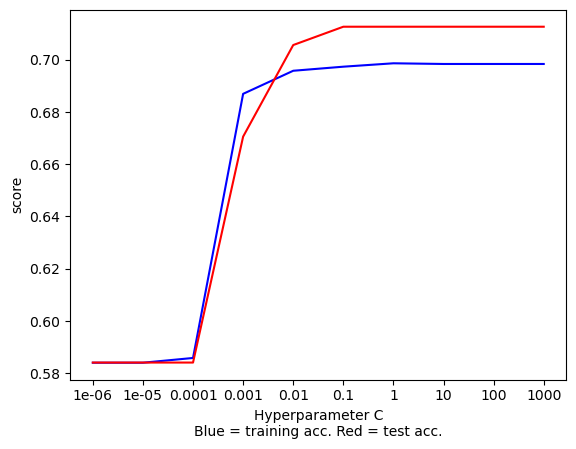

In [43]:
#plot the train and test score of split0.
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

From the figure above, the optimal value for C is 0.01. However this will not be the final choice as we have 9 more splits to consider. Now, let us plot the mean train and test score for all the splits.

Total number of models:  10


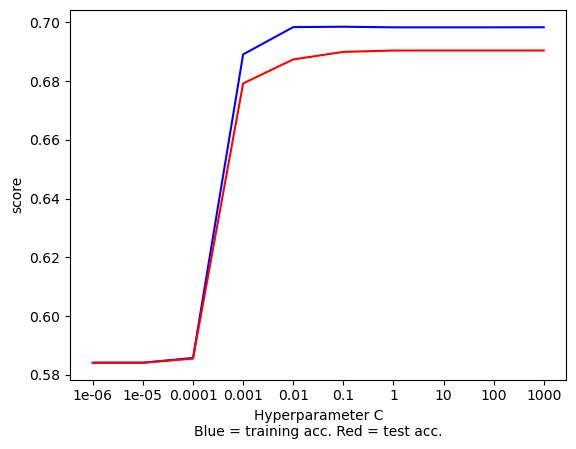

In [44]:
import matplotlib.pyplot as plt

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

From the above figure it can be noted that the default logistic regression model with parameter C=1 overfits. This figure ascertains that setting C > 0.01 causes the model to be overfiting (the test error beyond this point degrades regrardless of slight improvement in training accuracy error).

In [45]:
print(cv.best_params_)

{'C': 1}


In [46]:
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

Train accuracy: 0.6972176759410802
Test accuracy: 0.6879432624113475


In [47]:
best_model = cv.best_estimator_
best_model

LogisticRegression(C=1, random_state=10)

In [48]:
# grab feature importances from the model and feature name from the original X
coef = best_model.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

income_high : -0.34844713108961634
income_med : 0.31667122600071024
weight : 0.31627310913582046
height : -0.24890769133540921
house_count : 0.23994946265422906
age_100_110 : 0.2321221864216097
age_90_100 : 0.20239669226349405
working_travel critical : 0.16580021078791768
age_80_90 : 0.1521012678897797
age_60_70 : -0.15145331248787178
immigrant : -0.14155120970206425
insurance : 0.13528531552068518
worried : 0.10863281254625606
working_home : -0.09607252177663285
age_70_80 : -0.09300041143806471
age_20_30 : 0.08577206216715834
working_travel non critical : -0.08072391097706541
gender_other : 0.08030661091914368
blood_type_abp : 0.07382112118643376
gender_female : -0.06861753815134271


## Feature selection using Recursive Feature Elimination

In [49]:
from sklearn.feature_selection import RFECV

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train) # run the RFECV

# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 54
Number of features after elimination 41


In [50]:
# .transform() the original input set taking only the important features.
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

In [51]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_sel, y_train)

# test the best model
print("Train accuracy:", rfe_cv.score(X_train_sel, y_train))
print("Test accuracy:", rfe_cv.score(X_test_sel, y_test))

y_pred = rfe_cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(rfe_cv.best_params_)

Train accuracy: 0.6958148234743979
Test accuracy: 0.6901254773595199
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1070
           1       0.65      0.55      0.60       763

    accuracy                           0.69      1833
   macro avg       0.68      0.67      0.67      1833
weighted avg       0.69      0.69      0.69      1833

{'C': 0.1}


In [52]:
rfe_cv_best_model = rfe_cv.best_estimator_
rfe_cv_best_model

LogisticRegression(C=0.1, random_state=10)

In [53]:
# grab feature importances from the model and feature name from the original X
coef = rfe_cv_best_model.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

blood_type_bp : -0.3515631356346242
weight : 0.3106718032352313
blood_type_on : 0.308421552902226
height : -0.24135650526833272
contacts_count : 0.23656491030346508
age_80_90 : 0.19907273644245377
age_0_10 : 0.15991103130321158
race_other : 0.15961691516364976
age_70_80 : 0.15092206674365827
age_50_60 : -0.14880016086078554
immigrant : -0.13980107476072343
insurance : 0.1336095498651769
house_count : 0.10819222861638948
race_hispanic : -0.09802034651466558
age_60_70 : -0.09021696844309844
age_10_20 : 0.0854964708210601
race_white : -0.08311821967339524
gender_male : 0.07858318298556796
blood_type_abn : 0.07662240649711136
income_med : -0.07165688642502063


## Find Best model using ROC curve

In [27]:
### Enter your code 
from sklearn.metrics import roc_auc_score

y_pred_proba_lr = model.predict_proba(X_test)
y_pred_proba_lr_cv = cv.predict_proba(X_test)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_sel)


roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_lr_cv = roc_auc_score(y_test, y_pred_proba_lr_cv[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])

print("ROC index on test for `model`:", roc_index_lr)
print("ROC index on test for `cv`:", roc_index_lr_cv)
print("ROC index on test for `rfe_cv`:", roc_index_rfe_cv)


ROC index on test for `model`: 0.7416947367131711
ROC index on test for `cv`: 0.7416947367131711
ROC index on test for `rfe_cv`: 0.7421908109895764


In [28]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_lr_cv, tpr_lr_cv, thresholds_lr_cv = roc_curve(y_test, y_pred_proba_lr_cv[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])


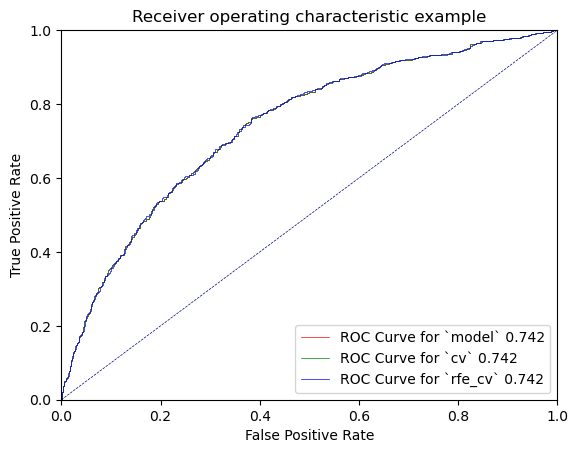

In [29]:
import matplotlib.pyplot as plt

plt.plot(fpr_lr, tpr_lr, label='ROC Curve for `model` {:.3f}'.format(roc_index_lr), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='ROC Curve for `cv` {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for `rfe_cv` {:.3f}'.format(roc_index_rfe_cv), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## save output

In [31]:
### Enter your code
import pickle
lr_best = rfe_cv
roc_index_lr_best = roc_index_rfe_cv
tpr_lr_best = tpr_rfe_cv
fpr_lr_best = fpr_rfe_cv
with open('LR.pickle', 'wb') as f:
    pickle.dump([lr_best,roc_index_lr_best, fpr_lr_best, tpr_lr_best], f)